In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# I will use the equation y=3x+4
x=[4,7,58,65,10,30]
weights=[1,3,3,3,3,3]
x=np.asarray(x)

In [ ]:
y=[]
for i in range(len(x)):
  y.append((weights[i]*x[i]))
print(y)

[4, 21, 174, 195, 30, 90]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=True)
print(y_test)

[174, 21]


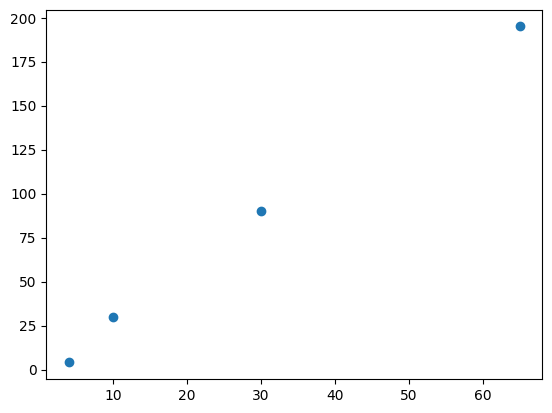

In [ ]:
plt.scatter(x_train,y_train)

In [ ]:
def msse(x_train,y_train):
  x_transpose=x_train.T
  xtranspose_timesx=np.dot(x_transpose,x_train)
  xtranspose_timesx=xtranspose_timesx.reshape(-1,1)
  # print(xtranspose_timesx)
  xtranspose_timesx=np.linalg.pinv(xtranspose_timesx)
  xtranspose_timesy=np.dot(x_transpose,y_train)
  xtranspose_timesy=xtranspose_timesy
  weight=np.dot(xtranspose_timesx,xtranspose_timesy)
  return weight

In [ ]:
y_predict=[]
weight = msse(x_train,y_train)[0][0]
print(weight)
for i in range(len(x_test)):
  y_predict.append(weight*x_test[i])
print(y_test)
print(y_predict)

2.9938942949818736
[174, 21]
[173.64586910894866, 20.957260064873115]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse=mean_squared_error(y_test,y_predict)
mae = mean_absolute_error(y_test, y_predict)
print("this is the weight ",weight)
print("mean squared error: ",mse)
print("mean absolute error: ", mae)

this is the weight  2.9938942949818736
mean squared error:  0.06361769502573349
mean absolute error:  0.19843541308911306


In [ ]:
# adding noise
x=[4,99,7,58,65,10,30]
weights=[1,1,3,3,3,3,3]
y=[]
for i in range(len(x)):
  y.append((weights[i]*x[i]))
print(y)

[4, 99, 21, 174, 195, 30, 90]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=True)
print(y_test)

[90, 21, 99]


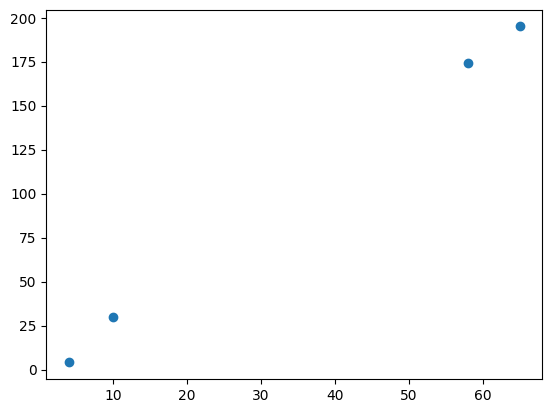

In [ ]:
plt.scatter(x_train,y_train)

In [ ]:
y_predict=[]
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
weight = msse(x_train,y_train)[0][0]
print("this is the weight ",weight)
for i in range(len(x_test)):
  y_predict.append(weight*x_test[i])
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse=mean_squared_error(y_test,y_predict)
mae = mean_absolute_error(y_test, y_predict)
print("mean squared error: ",mse)
print("mean absolute error: ", mae)

this is the weight  2.9958468526930564
mean squared error:  13013.788478592845
mean absolute error:  65.91416828898984


In [ ]:
iris_df=pd.read_csv("/content/sample_data/Iris.csv")

In [ ]:
def transform_values(df):
  for index,row in df.iterrows():
    if row['Species'] == 'Iris-setosa':
      df.loc[index, 'Species'] = 1
    elif row['Species'] =='Iris-virginica' or  row['Species']=='Iris-versicolor':
      df.loc[index, 'Species'] = -1
transform_values(iris_df)
iris_df=iris_df.drop(columns=['Id'])
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,-1
146,6.3,2.5,5.0,1.9,-1
147,6.5,3.0,5.2,2.0,-1
148,6.2,3.4,5.4,2.3,-1


In [ ]:
x=iris_df.iloc[:,:-1]
y=iris_df.iloc[:,-1]
b=np.ones(150)
x['Augmentation']=b
# # print(x)
# print(y)
class1_x=x.iloc[:50,:]
# print(class1_x)
class2_x=x.iloc[50:,:]
# print(class2_x)
class1_y=y.iloc[:50]
class2_y=y.iloc[50:]
# print(class1_y)

In [ ]:
x1_train,x1_test,y1_train,y1_test= train_test_split(class1_x,class1_y,test_size=0.2,random_state=True)
x2_train,x2_test,y2_train,y2_test= train_test_split(class2_x,class2_y,test_size=0.2,random_state=True)

In [ ]:
x1_train=np.asarray(x1_train)
x1_test=np.asarray(x1_test)
y1_train=np.asarray(y1_train)
y1_test=np.asarray(y1_test)
x2_train=np.asarray(x2_train)
x2_test=np.asarray(x2_test)
y2_train=np.asarray(y2_train)
y2_test=np.asarray(y2_test)
print(x1_test)

[[5.2 3.5 1.5 0.2 1. ]
 [5.  3.2 1.2 0.2 1. ]
 [5.  3.5 1.3 0.3 1. ]
 [4.4 3.  1.3 0.2 1. ]
 [4.7 3.2 1.3 0.2 1. ]
 [4.6 3.1 1.5 0.2 1. ]
 [5.3 3.7 1.5 0.2 1. ]
 [4.7 3.2 1.6 0.2 1. ]
 [5.1 3.8 1.6 0.2 1. ]
 [5.4 3.4 1.5 0.4 1. ]]


In [ ]:
def msse(x_train,y_train):
  x_transpose=x_train.T
  xtranspose_timesx=np.dot(x_transpose,x_train)
  # print(xtranspose_timesx)
  xtranspose_timesx=np.linalg.inv(xtranspose_timesx)
  xtx_inv_xt=np.dot(xtranspose_timesx,x_transpose)
  all_dot_y=np.dot(xtx_inv_xt,y_train)
  return all_dot_y

weights_class1=msse(x1_train,y1_train)
weights_class2=msse(x2_train,y2_train)
print(weights_class1)
print(weights_class2)

[5.10702591327572e-15 -1.1879386363489175e-14 1.2212453270876722e-15
 1.226796442210798e-14 1.000000000000048]
[-2.0650148258027912e-14 -2.0816681711721685e-15 9.33975119465913e-15
 -3.282096816548119e-15 -0.9999999999999614]


In [ ]:
class1_ypredict=np.dot(x1_test,weights_class1)
class2_ypredict=np.dot(x2_test,weights_class2)
# mse=mean_squared_error(y1_test,class1_ypredict)
# print("mean squared error is: ", mse)
print(class1_ypredict)
print(y1_test)
print(class2_ypredict)
print(y2_test)

[1.0000000000000373 1.0000000000000393 1.000000000000037
 1.0000000000000389 1.000000000000038 1.0000000000000389
 1.0000000000000353 1.0000000000000384 1.0000000000000333
 1.000000000000042]
[1 1 1 1 1 1 1 1 1 1]
[-1.0000000000000693 -1.000000000000045 -1.0000000000000484
 -1.0000000000000793 -1.0000000000000608 -1.0000000000000517
 -1.0000000000000673 -1.0000000000000542 -1.000000000000048
 -1.0000000000000582 -1.0000000000000453 -1.000000000000047
 -1.0000000000000313 -1.000000000000066 -1.0000000000000453
 -1.0000000000000542 -1.0000000000000486 -1.0000000000000477
 -1.000000000000054 -1.0000000000000393]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [ ]:
from sklearn.metrics import accuracy_score
ypredict=np.concatenate((class1_ypredict,class2_ypredict))
y_test=np.concatenate((y1_test,y2_test))
ypredict_binary = np.where(ypredict > 0, 1, 0)
y_test_binary = np.where(y_test > 0, 1, 0)
accuracy=accuracy_score(y_test_binary,ypredict_binary)
print("the accuracy for the linear classification model is: ",accuracy)

the accuracy for the linear classification model is:  1.0
